In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
dataset = pd.read_csv('data_encuesta.csv')

In [ ]:
dataset.shape

(229784, 11)

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format 

In [ ]:
dataset.head(5)

,mes,ciudad,n_habitaciones,vivienda_ocupada,cuota_amortizacion,personas_hogar,ingresos_del_hogar,linea_indigencia,linea_pobreza,pobre,indigente
0,3,BOGOTA,1,3,0,1,0,"179,659","452,860",1,1
1,3,BOGOTA,3,1,0,2,"1,450,000","179,659","452,860",0,0
2,3,BOGOTA,1,3,0,1,0,"179,659","452,860",1,1
3,3,BUCARAMANGA,4,1,0,2,"2,600,000","185,075","453,257",0,0
4,3,MONTERIA,3,1,0,3,"900,000","149,393","336,145",0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229784 entries, 0 to 229783
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   mes                 229784 non-null  int64  
 1   ciudad              229784 non-null  object 
 2   n_habitaciones      229784 non-null  int64  
 3   vivienda_ocupada    229784 non-null  int64  
 4   cuota_amortizacion  229784 non-null  int64  
 5   personas_hogar      229784 non-null  int64  
 6   ingresos_del_hogar  229784 non-null  float64
 7   linea_indigencia    229784 non-null  float64
 8   linea_pobreza       229784 non-null  float64
 9   pobre               229784 non-null  int64  
 10  indigente           229784 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 19.3+ MB


# veamos quienes son las ciudades con mas pobreza

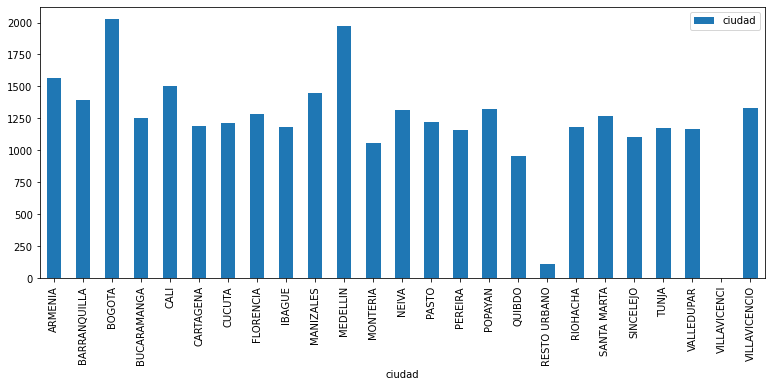

In [ ]:
dataset.groupby('ciudad')['ciudad'].count().plot(kind='bar',legend='Reverse',figsize=(13,5))

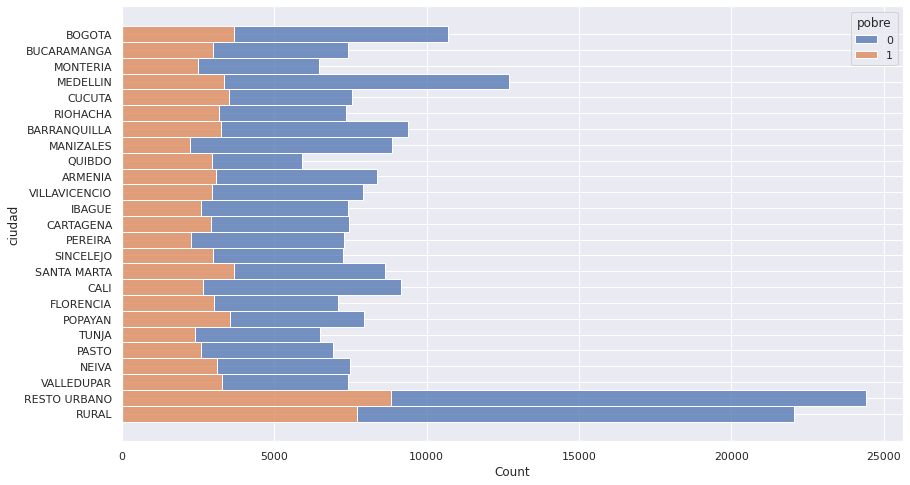

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
sns.histplot(data=dataset, y='ciudad', hue='pobre', multiple='stack')

**Medellin y bogota en el 2020 son las ciudades con mas pobreza en colombia**

# Ahora exploro en el 2020 como estuvo la encuesta de pobreza e indigencia por ciudad

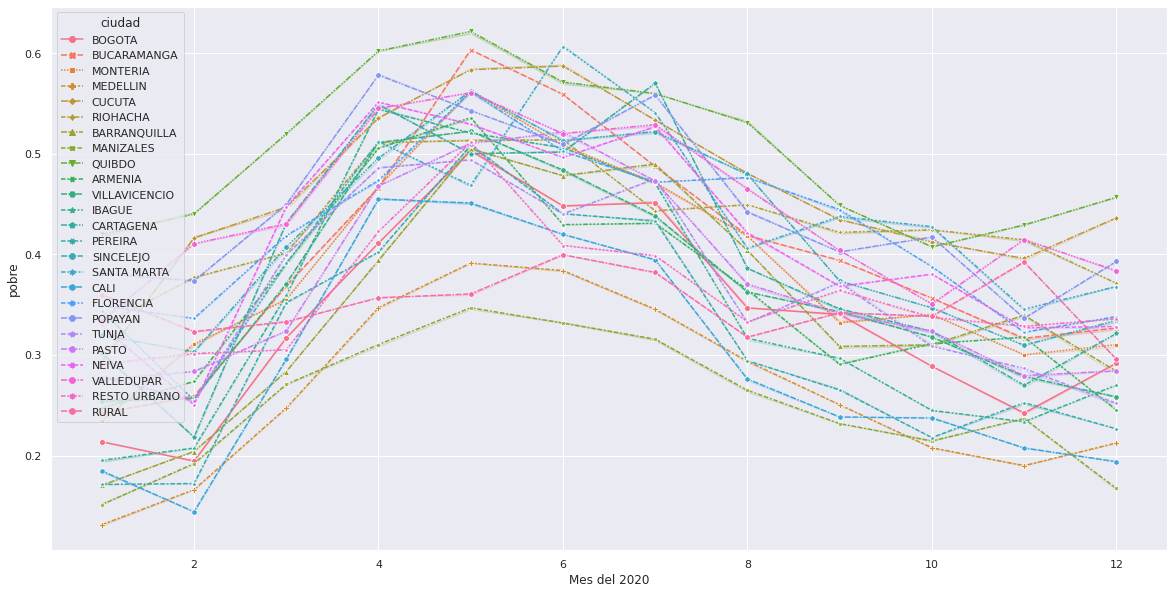

In [ ]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = dataset, x = 'mes', y = 'pobre', hue = 'ciudad',style = 'ciudad', markers = True, ci = 1)
_ = plt.xlabel('Mes del 2020')

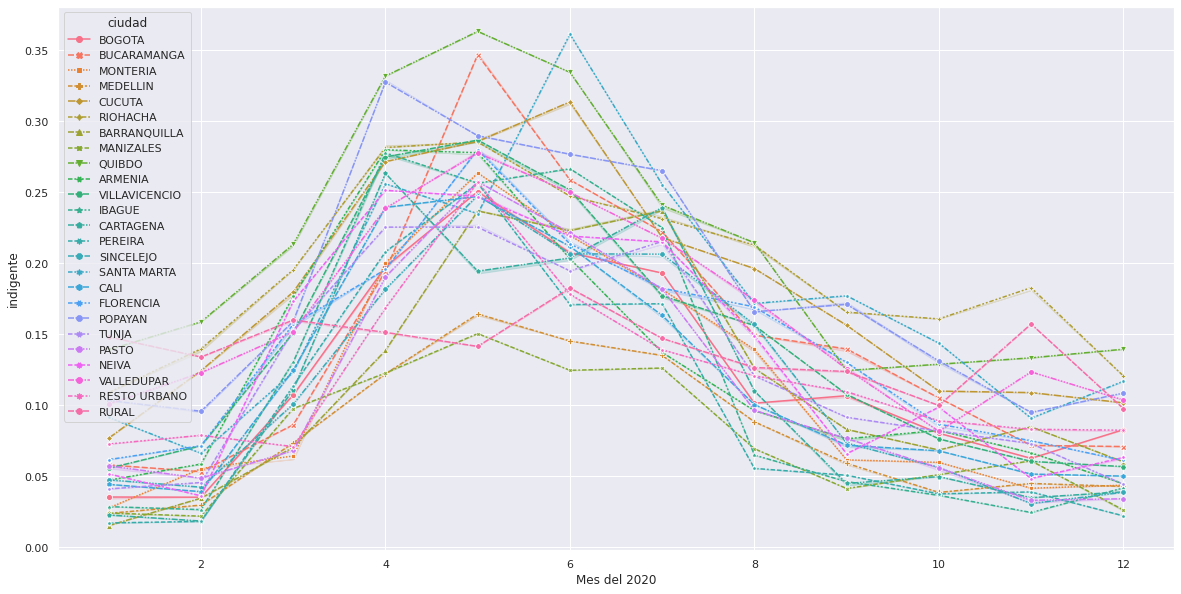

In [ ]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = dataset, x = 'mes', y = 'indigente', hue = 'ciudad',style = 'ciudad', markers = True, ci = 1)
_ = plt.xlabel('Mes del 2020')

la probreza e indigencia tienen el mismo comportamiento atravez del tiempo en todas las ciudades, desde marzo hasta junio del 2020 el numero de personas pobres e indigentes aumenta drasticamente yo diria que la principal causa fue la pandemia, pero despues del junio tiene una caida y el comportamieto es el mismo que a principio de año. 

# Ahora exploro si la pandemia afecto los ingresos en el hogar

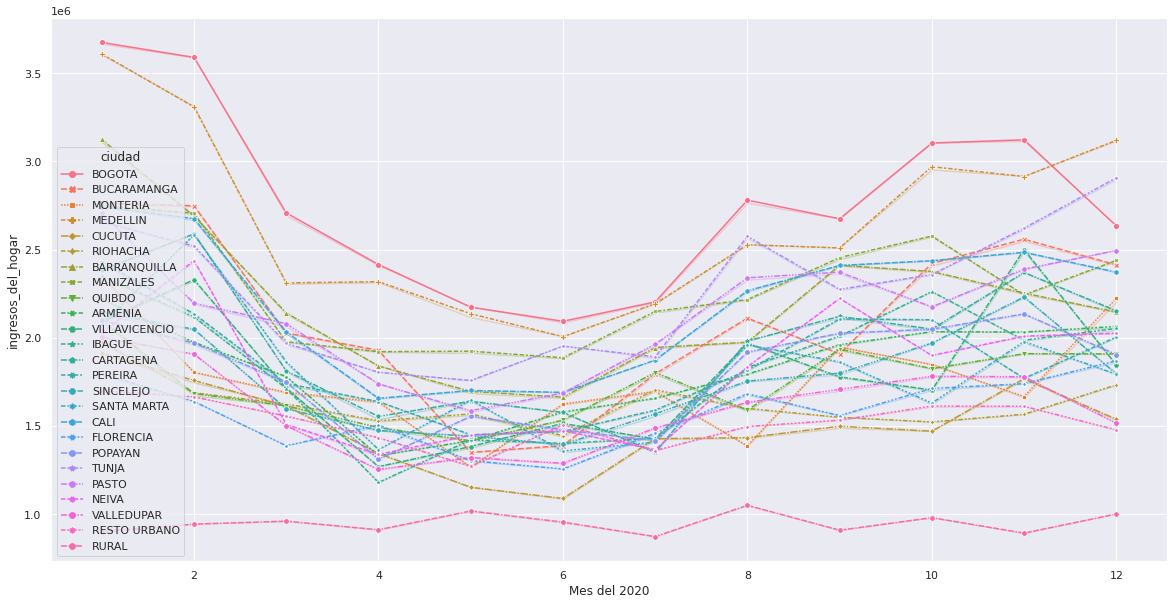

In [ ]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = dataset, x = 'mes', y = 'ingresos_del_hogar', hue = 'ciudad',style = 'ciudad', markers = True, ci = 1)
_ = plt.xlabel('Mes del 2020')

**como pensaba a inicios de la pandemia los ingresos del hogar disminuyen pero comienza a disminuir desde el mes de febrero y tiene una recuperación en el mes de julio, y por ultimo es que la pandemia no afecto mucho a las personas rurales, el daño fue mas en la ciudades principales del pais.**

In [ ]:
data['ingresos_del_hogar'].describe()

count    2.297840e+05
mean     1.837384e+06
std      2.414957e+06
min      0.000000e+00
25%      5.650000e+05
50%      1.158333e+06
75%      2.225416e+06
max      8.780000e+07
Name: ingresos_del_hogar, dtype: float64

**Hay registros en la base de datos de personas que los ingresos del hogar son cero.**

In [ ]:
data['cuota_amortizacion'].describe()

count    2.297840e+05
mean     2.304314e+04
std      5.244516e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.800000e+08
Name: cuota_amortizacion, dtype: float64

**Tambien hay encuestados en la bases de datos con una couta mensual o que estan pagando algun producto o credito a cuotas, estas personas no no creo que esten registradas como pobres mucho menos indigentes.**

# Echo un vistazo si existen personas que no son pobres ni indigentes en la base de datos

In [ ]:
con_cuota = dataset[dataset['cuota_amortizacion']>0]

In [ ]:
con_cuota['pobre'].describe()

count    7042.000000
mean        0.272224
std         0.445136
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: pobre, dtype: float64

**si hay personas pobres con cuota de amortización, pero tambien hay personas que no son pobres con cuota**

In [ ]:
con_cuota['indigente'].describe()

count    7042.000000
mean        0.105368
std         0.307049
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: indigente, dtype: float64

**Parece raro pero si hay encuestados en condición de indigencia con una cuota de amortización**

In [ ]:
indigentes_con_cuota = con_cuota[(con_cuota['cuota_amortizacion']>0) & (con_cuota['indigente']== 1)]

In [ ]:
indigentes_con_cuota['cuota_amortizacion'].describe()

count    7.420000e+02
mean     5.203619e+05
std      7.278930e+05
min      9.800000e+01
25%      1.882000e+05
50%      3.500000e+05
75%      6.500000e+05
max      1.200000e+07
Name: cuota_amortizacion, dtype: float64

**Por raro que parezca si hay personas en condicion de indigencia que pagan una cuota de amortizacion y la cuota las alta es de 1.200.000**

# Exploro como viven las personas encuestadas

In [ ]:
dataset['n_habitaciones'].unique()

array([ 1,  3,  4,  2,  5,  6,  7, 11,  8, 99,  9, 98, 21, 20,  0, 12, 10,
       16, 14, 13, 48, 17, 60, 18, 15])

In [ ]:
dataset.groupby('n_habitaciones')['n_habitaciones'].count()

n_habitaciones
0        77
1     13741
2     33509
3     91243
4     66483
5     18380
6      4505
7      1200
8       379
9       108
10       64
11       20
12       15
13        5
14        5
15        1
16        2
17        2
18        2
20        2
21        1
48        1
60        1
98       10
99       28
Name: n_habitaciones, dtype: int64

**Hay personas que viven en lugares de 0 habitaciones, pero lo mas raro es que hay registros de 98 y 99 habitaciones pero la cantidad es pequeña, estos son valores atipicos y pueden generar un sesgo en el analisis**

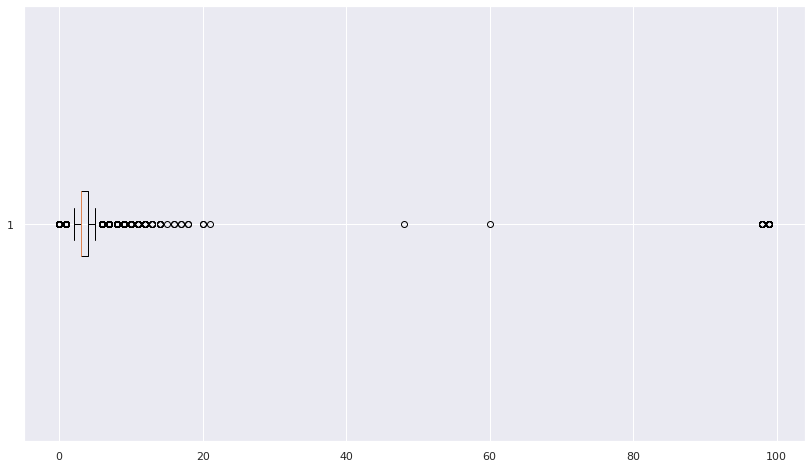

In [ ]:
plt.boxplot(dataset['n_habitaciones'], vert = False)
plt.show()

**Elimino los valores atipicos**

In [59]:
atipicos = dataset[dataset['n_habitaciones']>7]

In [60]:
dataset = dataset.drop(atipicos.index)

# Por ultimo mediante machine learning clasifico si una persona es pobre o indigente o ninguna de las dos.

In [90]:
dataset[dataset['indigente']== 1].describe()

,mes,n_habitaciones,vivienda_ocupada,cuota_amortizacion,personas_hogar,ingresos_del_hogar,linea_indigencia,linea_pobreza,pobre,indigente
count,"30,481","30,481","30,481","30,481","30,481","30,481","30,481","30,481","30,481","30,481"
mean,6,3,3,"12,634",4,"239,238","150,501","352,446",1,1
std,3,1,1,"138,909",2,"241,508","19,386","69,364",0,0
min,1,0,1,0,1,0,"112,268","199,196",1,1
25%,4,2,3,0,2,"40,000","139,367","314,082",1,1
50%,6,3,3,0,4,"174,146","149,683","357,106",1,1
75%,8,3,3,0,5,"368,333","164,220","406,011",1,1
max,12,7,6,"12,000,000",24,"2,251,250","185,075","457,188",1,1


**En la base de datos las mismas personas que son indigentes tambien son pobres**

In [91]:
dataset[(dataset['pobre']==0) & (dataset['indigente']== 0)].describe()

,mes,n_habitaciones,vivienda_ocupada,cuota_amortizacion,personas_hogar,ingresos_del_hogar,linea_indigencia,linea_pobreza,pobre,indigente
count,"143,906","143,906","143,906","143,906","143,906","143,906","143,906","143,906","143,906","143,906"
mean,7,3,2,"29,886",3,"2,545,431","149,269","355,119",0,0
std,4,1,1,"653,335",2,"2,755,173","18,540","69,099",0,0
min,1,0,1,0,1,0,"112,268","199,196",0,0
25%,3,3,1,0,2,"1,051,320","139,367","314,082",0,0
50%,7,3,3,0,3,"1,813,333","149,393","364,248",0,0
75%,10,4,3,0,4,"3,027,292","159,951","406,011",0,0
max,12,7,6,"180,000,000",24,"87,800,000","185,075","457,188",0,0


**y hay registros de encuestados que no son pobres ni indigentes**

# Sumo las dos variables 'pobre' e 'indgente' para formar una nueva columna

recordemos que las personas que son indigentes tambien son pobres, en el dataset pobre = 1 e indigente = 1 si las sumo me da 2 lo que quiere decir es que las personas que son indigentes nos da como resultado 2, si es solo pobre no da 1 y si no es pobre ni indigente es 0.

In [95]:
# sumo las dos variables
grupo = dataset['pobre'] + dataset['indigente']

In [96]:
import numpy as np

In [97]:
np.unique(grupo)

array([0, 1, 2], dtype=int64)

**ahora uno el grupo con el dataset pàra entrenar el modelo y hacer las predicciones**

In [98]:
dataset['grupo'] = grupo

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

**tomo solo 8000 mil datos al azar para entrenar el modelo**

In [100]:
train_data = dataset.sample(8000)

**para x elimino los datos que me generan ruido a la hora de entrenar el algoritmo**

In [102]:
x = train_data.drop(['mes','ciudad','pobre','indigente','grupo'], axis=1)
y = train_data['grupo']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [104]:
arbol = DecisionTreeClassifier()

**utilizo el ensamblador bagging para entrenar mejor el algoritmo**

In [106]:
clasificador = BaggingClassifier(base_estimator=arbol, n_estimators=50).fit(x_train, y_train)

In [107]:
predicciones_test = clasificador.predict(x_test)

In [109]:
print('SCORE arbol de desicion : {}'.format(accuracy_score(predicciones_test, y_test)))

SCORE arbol de desicion : 0.9245833333333333


**mi arbol de desicion me clasifico si una persona es indegente o pobre o ni pobre ni indigente, este algoritmo tiene una presicion de 92 % comparandolo con los datos de prueba.**

# Para verificar que el algoritmo no esta sobre ajustado y que puede clasificar datos nuevos lo voy a probar con un dataset de 50 registros.

In [110]:
datos_prueba = pd.read_csv('datos_prueba.csv')

In [111]:
datos_prueba.head()

,n_habitaciones,vivienda_ocupada,cuota_amortizacion,personas_hogar,ingresos_del_hogar,linea_indigencia,linea_pobreza
0,3,1,0,5,"1,000,000","139,369","334,273"
1,4,3,0,2,0,"184,190","453,964"
2,4,5,0,3,"8,870,944","185,075","453,257"
3,4,3,0,4,"1,691,675","167,327","375,243"
4,3,4,0,2,"300,000","139,369","334,273"


In [112]:
predicciones = clasificador.predict(datos_prueba)

In [113]:
predicciones

array([1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 2, 0, 0, 1], dtype=int64)

In [114]:
datos_prueba['grupo'] = predicciones

In [115]:
datos_prueba

,n_habitaciones,vivienda_ocupada,cuota_amortizacion,personas_hogar,ingresos_del_hogar,linea_indigencia,linea_pobreza,grupo
0,3,1,0,5,"1,000,000","139,369","334,273",1
1,4,3,0,2,0,"184,190","453,964",2
2,4,5,0,3,"8,870,944","185,075","453,257",0
3,4,3,0,4,"1,691,675","167,327","375,243",0
4,3,4,0,2,"300,000","139,369","334,273",1
5,3,3,0,5,"300,000","112,520","200,459",2
6,4,3,0,4,"1,746,050","141,684","301,801",0
7,2,3,0,5,"400,000","139,369","334,273",2
8,1,3,0,1,"33,333","177,562","457,188",2
9,3,1,0,1,"877,803","138,087","388,317",0


# El algorimo esta listo para recibir datos nuevos y predecir si algun encuestado esta en condición de pobreza o indigencia o ninguna de las dos 